# Deep Learning Project
### Philipp Bauer, Ardit Fazliu, Cassandra Könitzer, Julian Kulinsky

Intro Text ...

### Import Data

In [1]:
# Wenn es zu Import-Fehlern kommt, die upgrade Zeile auskommentieren und neu laden
%pip install mlxtend --upgrade
from mlxtend.frequent_patterns import fpgrowth, association_rules

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_json("/content/drive/MyDrive/DeepLearning_WiSe22-23/Sports_and_Outdoors_5.json", lines=True, nrows=10000)

In [5]:
meta_df = pd.read_json("/content/drive/MyDrive/DeepLearning_WiSe22-23/meta_Sports_and_Outdoors.json", lines=True, nrows=20000)

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/DeepLearning_WiSe22-23/df_cleaned_final.csv", nrows=15000)

## Task 1

### 1a) Hybrid Data Exploration

In [ ]:
#df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
0,5,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,What a spectacular tutu! Very slimming.,Five Stars,1433289600,NaN,NaN,NaN
1,1,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,What the heck? Is this a tutu for nuns? I know...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN
2,5,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,Exactly what we were looking for!,Five Stars,1421107200,NaN,NaN,NaN
3,5,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,I used this skirt for a Halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN
4,4,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,This is thick enough that you can't see throug...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN


In [ ]:
meta_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Adult Tutu Assorted Colors (Turquoise),[],,BubuBibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","712,899 in Clothing, Shoes & Jewelry (","[B071LQWQBQ, B00M14DG0O, B076GTTY9W, B07BSZ4GY...","<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.80,0000032042,[],[],NaN
1,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Bububibi Adult Ballet Tutu Cheetah Pink,[],,BubuBibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","712,899 in Clothing, Shoes & Jewelry (",[],"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",$11.97,0000032069,[],[],NaN
2,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[3 layers of super-soft polyester tulle can be...,,Girls Ballet Tutu Neon Orange,[B01MYHD3LV],,Unknown,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","[>#924,198 in Toys & Games (See Top 100 in Toy...","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...",Toys & Games,,,$5.70,0000031860,[],[],NaN
3,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[TUtu],,Girls Ballet Tutu Zebra Hot Pink,[],,Tutu,[Tutu],"1,314,199 in Sports & Outdoors (",[0000013714],Sports & Outdoors,,,$7.50,0000031852,[],[],NaN
4,"[Sports & Outdoors, Sports & Fitness, Other Sp...",,[Dance tutu for girls ages 2-8 years. Perfect ...,,Girls Ballet Tutu Neon Blue,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",,Bububibi,"[3 Layers - 100% Polyester Tulle, Hand Wash La...","[>#393,597 in Toys & Games (See Top 100 in Toy...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...",Toys & Games,,,$6.54,0000031895,[],[],NaN


# Fake Review Detection

Task1b: Fake Review Detection: Apply text mining and machine learning algorithms to detect potential fake reviews
Aim of this project is the detection of fake reviews

### 1. Definition von Features, welche uns helfen können Fake Reviews zu erkennen

| Feature                  | Definition                                                                                                                                        |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| Länge der Rezension      | Anzahl der Wörter in der Bewertung kann ein Hinweis darauf sein, ob sie echt oder gefälscht ist                                                   |
| Bewertungen pro Benutzer | Bewertungen können, von Bots erstellt werden - z.B. Nutzer neu registiert und nur eine Bewertung abgegeben hat, kann das ein wichtiges Indiz sein |
| Tendenz der Bewertung    | Gefälschte Bewertungen oft polarisierend -> sehr positiv oder sehr negativ                                                                        |
| Nützlichkeit             | Eventuelles Label Nützlichkeit zu definieren und damit eine Korrelation zwischen gefälschten Bewertungen und niedrigen Nützlichkeiten erarbeiten  |
| Verified User nutzen     | Verifizierte Bewertungsmetrik kann unterstützen, nur Vorsicht wenn Bots als verfiziert gehandhabt werden                                          |
| Bewertungsstil           | Wenn Bewertung in anderen Stil als andere Bewertungen verfasst ist, kann dadurch erkannt werden, dass es sich um ein fake Review handelt          |
| Kohärenz                 | Produkt wird anders bewertet als beschrieben                                                                                                      |
| Lesbarkeit               | Lesbarkeit als Label nutzen um gefälschte Bewertungen zu erkennen                                                                                 |
| Review text nutzen       | Eventuell Bag of Words Vektorisierung nutzen und Naive Bayes verwenden um Text zu klassifizieren                                                  |

### 2. Möglichkeiten von Fake Reviews

#### Wir erwarten die folgenden Arten von gefälschten Bewertungen im Datensatz

- Computergenerierte Bewertungen
- Menschlich generiert und zum Review-Farmen gekauft
- Menschlich erstellte negative Bewertungen
- Menschlich erstellte positive Bewertungen
- Eine Person mehrere Reviews auf einen Artikel

### 3. Folgerung

Als Folge aus den zuvor definierten Punkten achten wir in unserem Datensatz auf die folgenden Anzeichen:

**Review Merkmale**
Länge der Rezension
Durchschnittliche Wortlänge des Rezensenten
Anzahl von Sätzen
Durchschnittliche Satzlänge des Rezensenten
Prozentsatz der großgeschriebenen Wörter
Prozentsatz der positiven/negativen meinungsbildenden Wörter in jeder Rezension.

**Rezensenten Merkmale**
Maximale Anzahl von Bewertungen an einem Tag
Prozentsatz der Rezensionen mit positiver/negativer Bewertung
Durchschnittliche Länge der Rezensionen
Standardabweichung der Bewertungen der Rezensionen des Rezensenten

sources ('https://www2.cs.uh.edu/~arjun/tr/UH_TR_2014_07.pdf', 'https://ieeexplore.ieee.org/document/9760908', 'https://www.frontiersin.org/articles/10.3389/frai.2022.922589/full', 'https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model')


sources ('https://www2.cs.uh.edu/~arjun/tr/UH_TR_2014_07.pdf', 'https://ieeexplore.ieee.org/document/9760908', 'https://www.frontiersin.org/articles/10.3389/frai.2022.922589/full', 'https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model')### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from datetime import datetime
from time import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, pairwise_distances
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from nltk.corpus import stopwords
ENGLISH_STOP_WORDS = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm

In [2]:
# tokenizer methods
def spl_tokenizer(sentence):
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()
    listofwords = sentence.split(' ')
    listoflemmatized_words = []
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            token = WordNetLemmatizer().lemmatize(word)
            try:
                if tfidf.type == 'review':
                    token = 'r_' + token
                elif tfidf.type == 'summary':
                    token = 's_' + token
            except:
                pass
            listoflemmatized_words.append(token)
    return listoflemmatized_words


def tfidf(dataframe_column, tokenizer, min_df=0.02, max_df=0.8, ngram_range=(1,1)):
    column_name = dataframe_column.name
    if column_name == 'reviewText':
        tfidf.type = 'review'
    elif column_name == 'summary':
        tfidf.type = 'summary'
    else:
        tfidf.type = 'none'
    vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df, tokenizer = tokenizer, ngram_range = ngram_range)
    vectorizer.fit(dataframe_column)
    reviews_tokenized = vectorizer.transform(dataframe_column)
    tokens = pd.DataFrame(columns=vectorizer.get_feature_names(), data=reviews_tokenized.toarray())

    return tokens

### Data Loading

In [3]:
fake_review_base = pd.read_json('/Users/philippbauer/Downloads/Sports_and_Outdoors_5.json', lines=True, nrows=100000)


### Data Analysis

Overviewing the data allows us to gain a better understanding of the data we are working with, including its characteriscs, and patterns.

We want to get a rough sketch of the data set, its size, and gain first impressions.
Therefore, we have a look at the first and the last five rows and of a random data sample of 10 rows of the complete data set.

In [4]:
# Data Overview
fake_review_base.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
0,5,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,What a spectacular tutu! Very slimming.,Five Stars,1433289600,NaN,NaN,NaN
1,1,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,What the heck? Is this a tutu for nuns? I know...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN
2,5,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,Exactly what we were looking for!,Five Stars,1421107200,NaN,NaN,NaN
3,5,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,I used this skirt for a Halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN
4,4,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,This is thick enough that you can't see throug...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN


Looking at the data set, we learn that it filled with information of review text and data given for products bought on an online plattform.

In [5]:
# Show the last 5 rows
fake_review_base.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
99995,3,True,"05 24, 2015",A1I6408W52DF98,B000BP3GNC,Dan Harmon,This is for right-handers only. When I tried ...,It's fine for RIGHT HANDERS ONLY,1432425600,NaN,NaN,NaN
99996,4,True,"05 20, 2015",A1QA5TFSBZ63Z,B000BP3GNC,william,it takes a bit to get the feel for it but afte...,... feel for it but after a while you will lik...,1432080000,NaN,NaN,NaN
99997,3,True,"11 1, 2013",ACXOGPB6WVQWM,B000BP3GNC,jamelendez,the glove feels great but the locking mechanis...,it is okay,1383264000,NaN,NaN,NaN
99998,2,False,"04 17, 2013",A3L0ZUTV71UQ69,B000BP3GNC,murph,I like it but it was to big even on the small ...,Nice release,1366156800,NaN,NaN,NaN
99999,5,True,"03 31, 2016",AUB3SJR102TZT,B000BP7X8Q,Shopper,fast shipping and good quality life preserver....,Five Stars,1459382400,{'Color:': ' Orange'},NaN,NaN


In [6]:
# Sample overview to get 10 random examples
fake_review_base.sample(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
59816,5,True,"03 26, 2012",A1TM4O643FFSY1,B0007ZGZWU,MM,"For the money, it's hard to go wrong with the ...",Very good stop watch.,1332720000,{'Color:': ' Black'},NaN,NaN
27164,5,True,"08 28, 2017",A3CL75HUE4N67O,B000296Y3G,Amazon Customer,Awesome for sitting in the tent on those rainy...,Awesome for sitting in the tent on those rainy...,1503878400,{'Color:': ' Sage Green/Black'},NaN,NaN
9151,4,True,"04 13, 2017",AV69WS0API1US,B0000AE6QU,lombardi4vr,The box arrived intact and the backboard went ...,The box arrived intact and the backboard went ...,1492041600,NaN,NaN,NaN
66628,5,True,"07 16, 2016",A3HNLV0SFL16DJ,B0009KF4GG,DT,This multi-tool is great for every day carry. ...,Great all purpose EDC,1468627200,{'Style:': ' Camper II'},NaN,NaN
43559,5,True,"02 9, 2015",AM9GM2RJ09Z30,B0006G8SH0,Billy,Favorite knife ever. Have lost two and bought ...,Favorite knife ever,1423440000,"{'Color:': ' Olive', 'Style Name:': ' Serrated...",NaN,NaN
89355,4,True,"12 14, 2016",A3A5DSPWYN204Y,B000B2XR5W,troach,Kids have been using it for almost 2 years now...,Four Stars,1481673600,NaN,NaN,NaN
31174,5,True,"02 10, 2017",A1I318RAI04O9Q,B0002LMRIK,GC,I have towed this behind the snowmobile a few ...,... behind the snowmobile a few times and it w...,1486684800,{'Color:': ' Black'},NaN,NaN
3862,5,True,"01 9, 2015",A2MRH36J6P1IQH,B00005BUQU,scottw,I wanted a frisbee for my young ones that woul...,A better frisbee,1420761600,{'Color:': ' multi'},NaN,NaN
34703,5,True,"10 30, 2016",A1KES2A3QH0IVU,B0002X3APM,Rebeca Morales,Looks very nice on my mailbox.,Five Stars,1477785600,{'Team Name:': ' Dallas Cowboys'},NaN,NaN
62471,5,True,"12 23, 2015",A1ALTUWYHUWQAA,B00095VCU8,Lonely Hearts Animal Rescue,"Item shipped quickly, as expected. Would deal...",Five Stars,1450828800,NaN,NaN,NaN


#### Identifying Variables
The "info()"-function provides us with information of the data frame such as index type, dtype, columns, non-values, and memory usage. It gives us a short overview of the dataset.
It's a handy approach when doing exploratory analysis of the data.

In [7]:
# Feature names, null count and dtype
fake_review_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         100000 non-null  int64 
 1   verified        100000 non-null  bool  
 2   reviewTime      100000 non-null  object
 3   reviewerID      100000 non-null  object
 4   asin            100000 non-null  object
 5   reviewerName    99992 non-null   object
 6   reviewText      99966 non-null   object
 7   summary         99985 non-null   object
 8   unixReviewTime  100000 non-null  int64 
 9   style           60677 non-null   object
 10  vote            12143 non-null   object
 11  image           1121 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 8.5+ MB


We learn that we have 12 different features consisting of in64 and objects - there seem to be missing values as well which we will have to handle later on

In [8]:
fake_review_base.describe()

,overall,unixReviewTime
count,100000.000000,1.000000e+05
mean,4.425120,1.424004e+09
std,1.020306,6.296617e+07
min,1.000000,9.689760e+08
25%,4.000000,1.393978e+09
50%,5.000000,1.432253e+09
75%,5.000000,1.468454e+09
max,5.000000,1.526170e+09


Only the mean of the overall score seems to be of importance for us, giving us the mean stars given for the products

Text(0, 0.5, 'count')

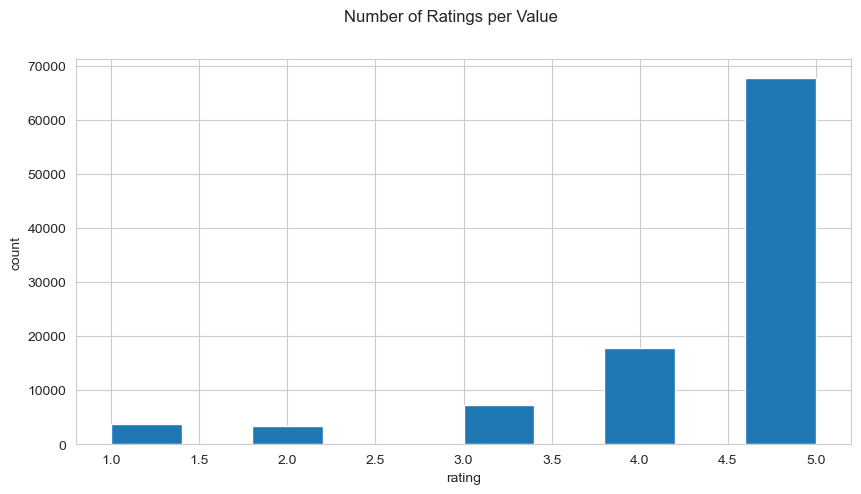

In [9]:
#Get count of values in a categorical variable, with how much stars a product has been rated
values = fake_review_base.overall.value_counts()
values
plt.suptitle("Number of Ratings per Value")
fake_review_base.overall.hist(figsize=(10,5))
plt.xlabel('rating')
plt.ylabel('count')

#### Missing Values
Since we found some missing values earlier, we will take a look at the numbers and a matrix to visualize it

In [10]:
# Nan Count per Column
fake_review_base.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          8
reviewText           34
summary              15
unixReviewTime        0
style             39323
vote              87857
image             98879
dtype: int64

<AxesSubplot:>

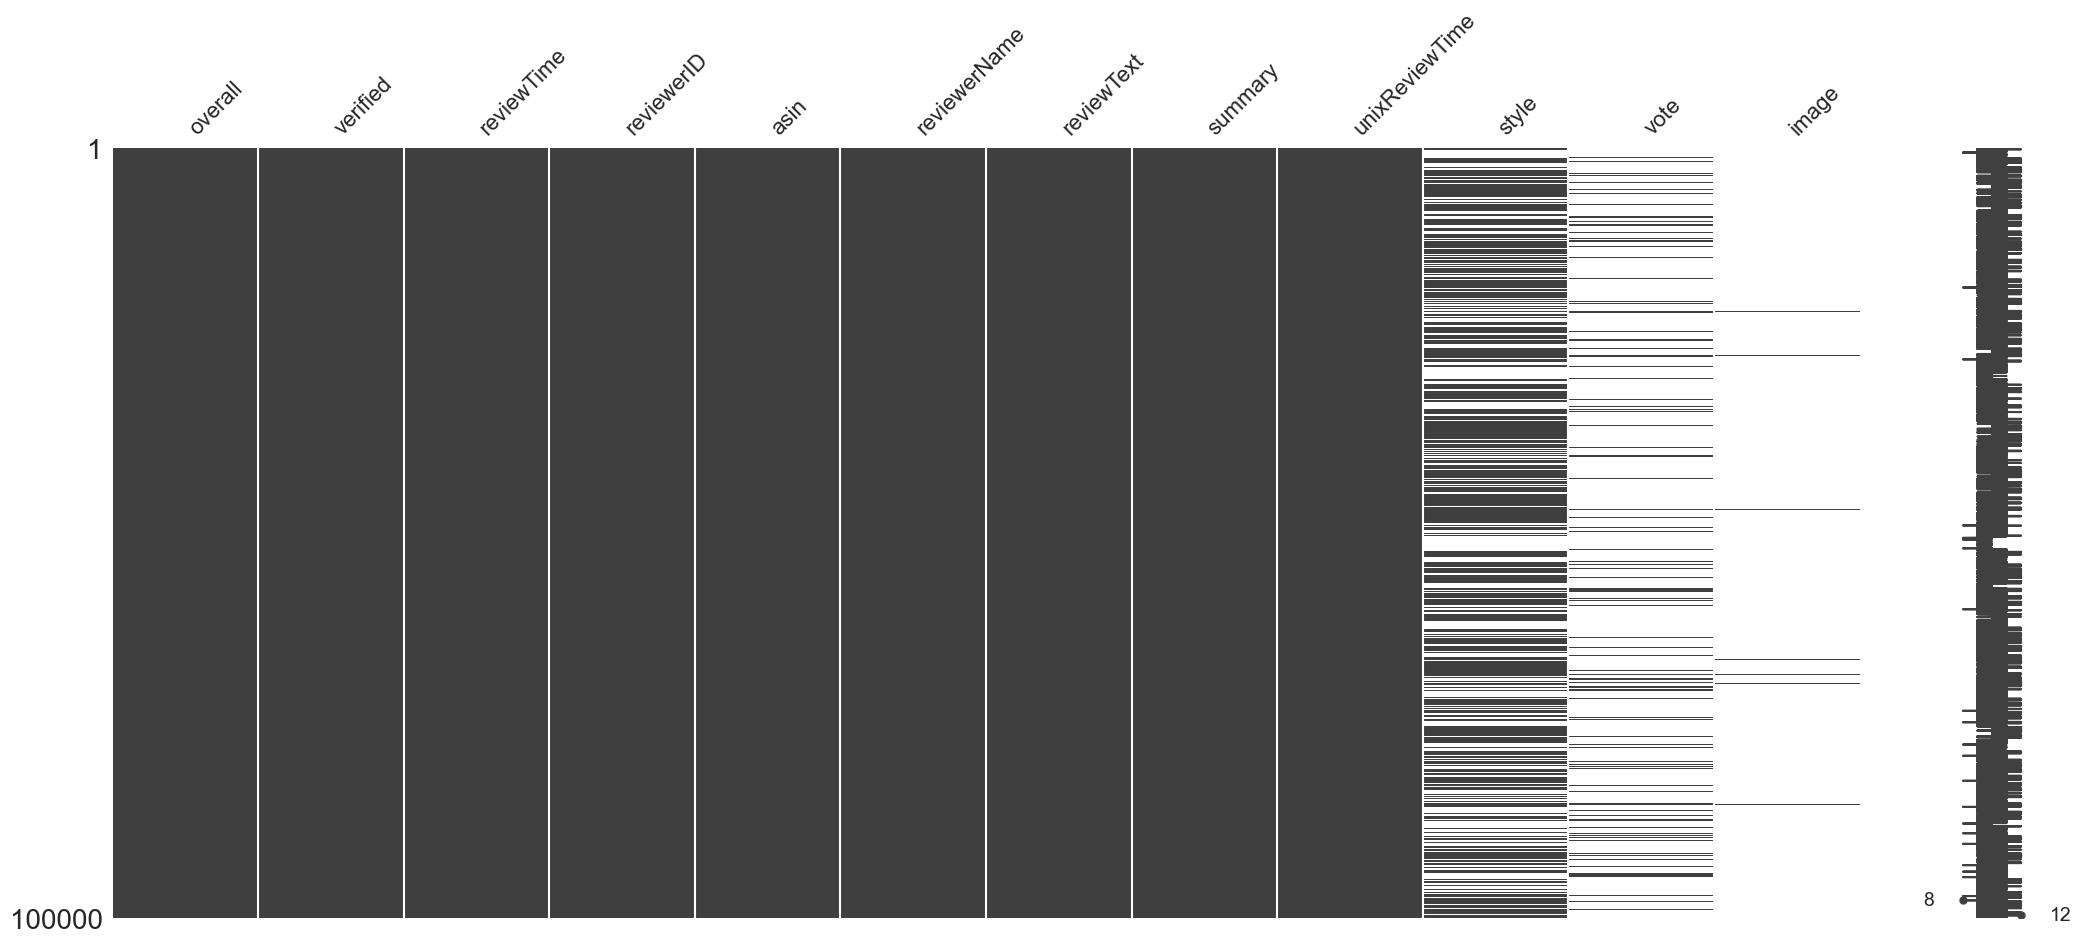

In [11]:
# Visualisation
msno.matrix(fake_review_base)

We realize that there are many values missing - more info of the dataset can be generated after we handle them and clean up the data overall

### Data Cleaning

In [12]:
# Cleaning Date field from unix to timestamp
fake_review_clean = fake_review_base.copy()

fake_review_clean['unixReviewTime'] = pd.to_datetime(fake_review_clean['unixReviewTime'],unit='s')

fake_review_time = fake_review_clean.copy()

# review time not needed anymore because of duplication with timestamp
# but save month and day of week for comparison purposes
fake_review_clean['month'] = pd.DatetimeIndex(fake_review_clean['reviewTime']).month
fake_review_clean['dayofweek'] = pd.DatetimeIndex(fake_review_clean['reviewTime']).dayofweek

fake_review_clean = fake_review_clean.drop('reviewTime', axis=1)

# dd-mm-yyyy format
fake_review_clean['unixReviewTime'] = fake_review_clean['unixReviewTime'].dt.strftime('%d-%m-%Y')


In [13]:
# Remove empty cells
fake_review_clean = fake_review_clean.drop(len(np.where(pd.isnull(fake_review_clean))))

In [14]:
# drop cells not needed for fake review detection
fake_review_clean = fake_review_clean.drop(['style', 'image'], axis=1)

In [15]:
# Drop rows without review
fake_review_clean = fake_review_clean[fake_review_clean['reviewText'].notna()]

In [16]:
#fill empty summaries with review text
fake_review_clean['summary'].fillna(fake_review_clean['reviewText'], inplace = True)

In [17]:
#fill empty vote with 0
fake_review_clean['vote'].fillna(0, inplace = True)

In [18]:
# No emtpy names -> fill them with 'No_Name_Given' and if not mark special feature column as 0
fake_review_clean['reviewerName'].fillna('No_Name_Given', inplace = True)
fake_review_clean['nameGiven'] = np.where(fake_review_clean['reviewerName'] != 'No_Name_Given',1,0)

In [19]:
#Convert True and False to binary
map_dict = {False:0, True:1}
fake_review_clean['verified'] = fake_review_clean['verified'].map(map_dict)

In [20]:
# Reset index since we dropped values
fake_review_clean = fake_review_clean.reset_index().drop('index', axis=1)

In [21]:
# Text Review Preprocessing
stop = stopwords.words('english')
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop))

In [22]:
fake_review_clean

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,month,dayofweek,nameGiven
0,5,1,A180LQZBUWVOLF,0000032034,Michelle A,What spectacular tutu! Very slimming.,Five Stars,03-06-2015,0,6,2,1
1,1,1,ATMFGKU5SVEYY,0000032034,Crystal R,What heck? Is tutu nuns? I know cut STILL. Als...,Is this a tutu for nuns?!,01-04-2015,0,4,2,1
2,5,1,A22CP6Z73MZTYU,0000032034,L. Huynh,I used skirt Halloween costume glued bunch fea...,I liked that the elastic waist didn't dig in (...,23-12-2014,0,12,1,1
3,4,1,A22L28G8NRNLLN,0000032034,McKenna,"This thick enough can't see it, long, sure che...",This is thick enough that you can't see throug...,15-12-2014,0,12,0,1
4,5,1,A5N0QU8JBRVQQ,0899332757,Amazon Customer,"Already Atlas, topo CD set Northeast, Garmin G...",I love maps,05-07-2008,0,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99960,3,1,A1I6408W52DF98,B000BP3GNC,Dan Harmon,This right-handers only. When I tried put left...,It's fine for RIGHT HANDERS ONLY,24-05-2015,0,5,6,1
99961,4,1,A1QA5TFSBZ63Z,B000BP3GNC,william,takes bit get feel like,... feel for it but after a while you will lik...,20-05-2015,0,5,2,1
99962,3,1,ACXOGPB6WVQWM,B000BP3GNC,jamelendez,glove feels great locking mechanism really suc...,it is okay,01-11-2013,0,11,4,1
99963,2,0,A3L0ZUTV71UQ69,B000BP3GNC,murph,I like big even small setting. When I put bow ...,Nice release,17-04-2013,0,4,2,1


In [23]:
# remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

In [24]:
# lower
fake_review_clean['reviewText'] = fake_review_clean['reviewText'].apply(lambda x: x.lower())

#### same for summary

In [25]:
# Drop rows without review
fake_review_clean = fake_review_clean[fake_review_clean['summary'].notna()]
# Text Review Preprocessing
stop = stopwords.words('english')
fake_review_clean['summary'] = fake_review_clean['summary'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop))
# remove punctuations
tokenizer = RegexpTokenizer(r'\w+')
fake_review_clean['summary'] = fake_review_clean['summary'].apply(
    lambda x: ' '.join(word for word in tokenizer.tokenize(x)))
# lower
fake_review_clean['summary'] = fake_review_clean['summary'].apply(lambda x: x.lower())

In [26]:
# Check data for status
fake_review_clean.isna().sum()

overall           0
verified          0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
month             0
dayofweek         0
nameGiven         0
dtype: int64

Data seems to have no more missing values and is tokenized

In [27]:
# Look for duplicates and show them
print(fake_review_clean.duplicated().sum())
fake_review_clean[fake_review_clean.duplicated()].head(fake_review_clean.duplicated().sum())

181


,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,month,dayofweek,nameGiven
1673,5,1,A3JDWJTM1UBJCF,B00004R9MM,J. Lamar Jackson,as expected,five stars,23-01-2016,0,1,5,1
2982,4,1,AUBJFI9PRXYIG,B0000534W2,Captain,good,four stars,04-09-2017,0,9,0,1
11403,5,1,AHPTFHERGIR1I,B0000C5360,Abercrombe,use long guns,five stars,27-01-2016,0,1,2,1
11509,3,1,A13QG368UYQLL9,B0000C5360,Gary,works like supposed,three stars,21-08-2014,0,8,3,1
16030,5,1,A16WGR7YU6QIQ4,B0000WR6W8,Pen Name,great,five stars,08-02-2016,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95587,5,1,A3OIP68AT21D02,B000BJ7WPG,J D W,great product great price,great product great price,25-07-2014,0,7,4,1
97976,5,1,A22GZQL2774EZO,B000BNGUPK,going2sunroad,keeps food cold hours,five stars,21-10-2014,0,10,1,1
98000,5,1,A1WB0B9DXQ1TI0,B000BNGUPK,Steen,best cooler i ve ever owned easy use clean kee...,five stars,10-07-2014,0,7,3,1
98546,5,1,A36HN9RYBONOV0,B000BNYYAS,Juan Espinosa,as expected,five stars,12-11-2015,0,11,3,1


It is extremely noticeable that many of the duplicate reviews have a similar structure and often also fall on the same products, but knowing, that there is also another duplicate we try to get rid of them for now, but save them in a dataframe for a possible flagging use later on

In [28]:
# save duplicates in another dataframe
duplicates = fake_review_clean[fake_review_clean.duplicated()].head(fake_review_clean.duplicated().sum())
#drop duplicates
fake_review_clean.drop_duplicates(inplace=True)
# check duplicates
print(fake_review_clean.duplicated().sum())

0


In [29]:
# reviewer behaviour pattern by looking at reviews per reviewer
fake_review_clean["reviewerID"].value_counts()

A3OXHLG6DIBRW8    29
A1M2T0J45TTE64    14
AJGU56YG8G1DQ     13
A37R0DRFA8ERAE    13
A10HS51L0GC1R4    12
                  ..
A1N6699ZT9AP7C     1
A28KTL8AO6JOQ3     1
A2OJMMOF414G0K     1
A2C8MNIBJEGNF8     1
A3L0ZUTV71UQ69     1
Name: reviewerID, Length: 77306, dtype: int64

### Continued EDA
After cleaning most of the data we can visualize more of the insights the data gives us, for example the number of verified purchases over the last couple of years or the distributions of the numeric features

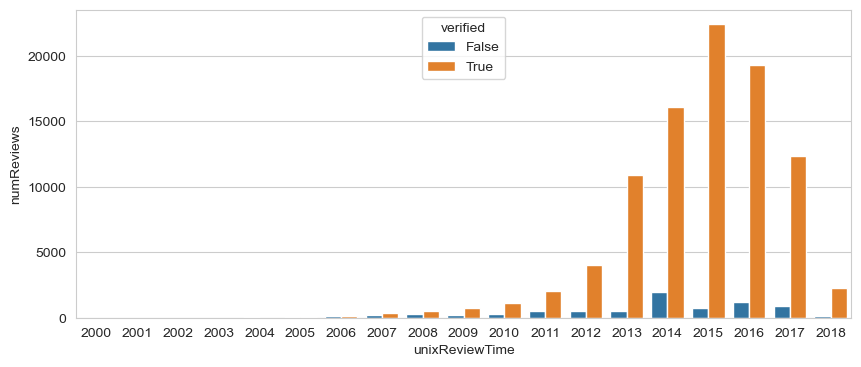

In [30]:
#plotting number of reviews per year (segmented by verified purchases)
verified_year = fake_review_time['verified'].groupby(fake_review_time['unixReviewTime'].dt.year).value_counts()
verified_year = verified_year.reset_index(level='unixReviewTime').rename(columns={'verified':'numReviews'}).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='unixReviewTime', y='numReviews', hue='verified', data=verified_year)
plt.show()

Since the number of unverified reviews seems to below but can still be significant, we are also looking for fake reviews, we look at the number of ratings by unverfied accounts

Text(0, 0.5, 'count')

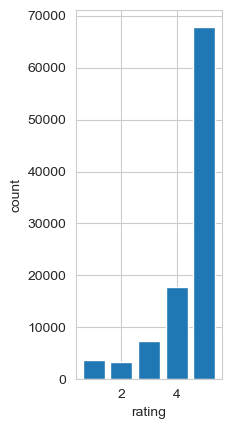

In [31]:
plt.subplot(1,3,1)
plt.bar(fake_review_base['overall'].value_counts().index, fake_review_base['overall'].value_counts().values)
plt.xlabel('rating')
plt.ylabel('count')

It looks like q big margin of users are verfied, this means that while we definetly will look at the number of fake reviews made by unverified accounts, we still have to check for verified users. To increase our chances of finding those accounts, we will need to add more features to our dataset

## Feature Engineering

In [32]:
# Let's check for reviews per reviewer per date
reviews_per_date1 = fake_review_clean[['reviewerID', 'unixReviewTime']].copy()
reviews_per_date2 = reviews_per_date1.groupby(by=['unixReviewTime', 'reviewerID']).size().reset_index(name='review_per_date')
reviews_per_date2['review_per_date'] = reviews_per_date2['review_per_date'] / reviews_per_date2['review_per_date'].max()
fake_review_clean = fake_review_clean.merge(reviews_per_date2, on=['reviewerID', 'unixReviewTime'], how='inner')

In [33]:
# numer of reviews per asin
map_numreviews = fake_review_clean['asin'].value_counts().to_dict()
fake_review_clean['asin_review_number'] = fake_review_clean['asin'].map(map_numreviews)

In [34]:
fake_review_clean.groupby('review_per_date').size().sort_values(ascending=False)

review_per_date
0.083333    84694
0.166667    12040
0.250000     2280
0.333333      484
0.416667      145
0.500000       78
0.583333       35
0.666667       16
1.000000       12
dtype: int64

In [35]:
# create feature if reviewer has posted multiple reviews
review_dict = fake_review_clean['reviewerID'].value_counts().to_dict()
# map dict
fake_review_clean['multipleReviews_reviewer'] = fake_review_clean['reviewerID'].map(review_dict)
# convert binary
fake_review_clean['multipleReviews_reviewer'] = np.where(fake_review_clean['multipleReviews_reviewer'] > 1, 1, 0)

In [36]:
# check for lengths of reviews
fake_review_clean['length'] = fake_review_clean['reviewText'].apply(lambda x: len(x.split()))

In [37]:
# get review deviation between mean and review
fake_review_clean['rating_deviation'] = abs(fake_review_clean['overall'] - fake_review_clean["overall"].mean()) / 4

In [38]:
# creature feature to see reviewers with only 5 star or one star reviews and second one with high rating deviation
five_star_reviewers = fake_review_clean['overall'].groupby(fake_review_clean['reviewerID']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
one_star_reviewers = fake_review_clean['overall'].groupby(fake_review_clean['reviewerID']).agg(lambda x: (np.unique(x)==1).all()).to_dict()
# add columns
fake_review_clean['five_star_reviewer'] = fake_review_clean['reviewerID'].map(five_star_reviewers)
fake_review_clean['one_star_reviewer'] = fake_review_clean['reviewerID'].map(one_star_reviewers)
# binary again
fake_review_clean['five_star_reviewer'] = fake_review_clean['five_star_reviewer'].astype(int)
fake_review_clean['one_star_reviewer'] = fake_review_clean['one_star_reviewer'].astype(int)

In [39]:
# forgot summary length
# check for lengths of summaries
fake_review_clean['length_summary'] = fake_review_clean['summary'].apply(lambda x: len(x.split()))

In [40]:
fake_review_eng = fake_review_clean

## Tokenization, lemmatisation and stemming

In [41]:
review_tokens = tfidf(fake_review_eng['reviewText'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=1000)
summary_tokens = tfidf(fake_review_eng['summary'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=800)

/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feat

## Scaling

In [42]:
# only scale numerics
fake_review_eng_numerics = fake_review_eng.select_dtypes(include=['int32','int64'])

In [43]:
# Scaling
minmaxscaler = MinMaxScaler()
fake_review_eng_scaled = minmaxscaler.fit_transform(fake_review_eng_numerics)
fake_review_scaled = pd.DataFrame(fake_review_eng_scaled, columns = fake_review_eng_numerics.columns)

del fake_review_eng_numerics, fake_review_eng_scaled

In [44]:
fake_review_scaled

,overall,verified,month,dayofweek,nameGiven,asin_review_number,multipleReviews_reviewer,length,five_star_reviewer,one_star_reviewer,length_summary
0,1.00,1.0,0.454545,0.333333,1.0,0.001971,0.0,0.003817,1.0,0.0,0.038462
1,0.00,1.0,0.272727,0.333333,1.0,0.001971,0.0,0.016794,0.0,1.0,0.057692
2,1.00,1.0,1.000000,0.166667,1.0,0.001971,0.0,0.039695,1.0,0.0,0.134615
3,0.75,1.0,1.000000,0.000000,1.0,0.001971,0.0,0.011450,0.0,0.0,0.115385
4,1.00,1.0,0.545455,0.833333,1.0,0.013798,0.0,0.046565,1.0,0.0,0.057692
...,...,...,...,...,...,...,...,...,...,...,...
99779,0.50,1.0,0.363636,1.000000,1.0,0.003285,1.0,0.067176,0.0,0.0,0.115385
99780,0.75,1.0,0.363636,0.333333,1.0,0.003285,0.0,0.003817,0.0,0.0,0.038462
99781,0.50,1.0,0.909091,0.666667,1.0,0.003285,1.0,0.014504,0.0,0.0,0.019231
99782,0.25,0.0,0.272727,0.333333,1.0,0.003285,0.0,0.009924,0.0,0.0,0.038462


## PCA
To reduce the dimensionality of our data we will use a PCA to reduce the set and optimize the future K-Means Clustering

In [45]:
# we will only used to tokenized data of the reviewText and the scaled dataset
review_tokens = tfidf(fake_review_eng['reviewText'], tokenizer=spl_tokenizer, ngram_range=(1,2), min_df=1000)
df_pca = pd.concat([fake_review_scaled, review_tokens], axis = 1)

/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/philippbauer/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
# since my computer crashed quite often I delete most of the dataframes used earlier
del review_tokens, fake_review_scaled

In [50]:
# Create a PCA instance: pca
pca = PCA(n_components=392)
pcs = pca.fit_transform(df_pca)

In [52]:
#explained variance per ratio
print('PCA Variance Ratio for 200 PCs: ', pca.explained_variance_ratio_.cumsum()[200])
print('PCA Variance Ratio for 300 PCs: ', pca.explained_variance_ratio_.cumsum()[300])
print('PCA Variance Ratio for 392 PCs: ', pca.explained_variance_ratio_.cumsum()[391])

PCA Variance Ratio for 200 PCs:  0.8726013190677878
PCA Variance Ratio for 300 PCs:  0.9521166779173764
PCA Variance Ratio for 392 PCs:  1.000000000000001


In [53]:
PCA_components = pd.DataFrame(pcs)

In [94]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,-0.565265,0.106744,-0.133382,-0.054081,-0.038477,-0.175321,-0.068663,-0.048740,-0.025539,-0.013114,...,0.003099,0.000843,0.005431,0.001124,0.000445,0.002094,0.000129,0.031182,-0.000206,-0.000122
1,0.576021,0.944928,-0.121804,-0.237450,-0.016145,-0.502447,0.799048,0.049511,0.054596,0.000038,...,-0.011829,-0.012188,0.007173,-0.007530,0.007431,-0.005662,-0.015724,-0.004359,-0.003812,-0.000100
2,-0.554884,0.114780,-0.328609,0.479468,-0.063749,-0.190439,-0.081460,-0.090035,-0.100226,-0.009961,...,-0.003605,-0.008149,-0.006558,-0.002914,0.012505,-0.006780,-0.001022,-0.007475,-0.002640,0.000501
3,0.308898,0.624395,-0.495532,0.461581,-0.123361,-0.098372,-0.256574,-0.026518,-0.062696,-0.032699,...,-0.007773,0.007930,-0.004784,-0.004089,0.000730,-0.000110,0.003490,0.007080,-0.001094,0.000472
4,-0.561143,0.108782,0.361363,0.062063,-0.040869,-0.173168,-0.060255,-0.074088,-0.074684,-0.018925,...,-0.005568,0.001132,-0.009524,-0.006787,0.002398,-0.003384,-0.023219,0.006717,-0.002328,-0.000893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99779,0.911307,-0.142970,0.538283,-0.116591,-0.076153,-0.183180,0.034863,-0.032186,-0.077893,-0.034415,...,0.386923,0.284749,0.082240,0.012705,-0.000071,-0.008484,-0.003386,-0.021753,0.000512,0.000584
99780,0.311469,0.625471,-0.129209,-0.155811,-0.074518,-0.087550,-0.255778,-0.034579,-0.081199,-0.029226,...,0.002692,0.002569,0.000721,-0.000470,0.001486,-0.000427,-0.000283,0.004336,0.000044,-0.000340
99781,0.898828,-0.151129,0.174398,0.409860,-0.128977,-0.178453,0.011898,0.138000,0.000061,-0.054695,...,-0.017166,-0.007984,-0.008105,-0.021967,0.009950,0.000722,-0.002301,-0.023640,-0.001620,0.000625
99782,0.494448,0.780190,-0.111409,-0.164867,0.934095,-0.120816,0.035669,0.001469,-0.038305,-0.014231,...,0.000310,-0.000170,0.002929,-0.002192,0.004675,-0.004738,0.003666,-0.006712,-0.001532,0.000430


After looking at the results of the PCA, we find the components having 392 features. We have to be careful though, since we used only 100000 rows for our calucations. Meaning the full dataset might find more different features

## K-Means Clustering
We start by looking for the best possible inertia scores by cycling through the different values, this task has been very computing intesive and was the main reason we limited our dataset to 100000 rows

In [56]:
k_values = range(8,32)
inertia_scores = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, verbose=1)
    #fitting on all 392 PCs
    kmeans_model.fit(PCA_components.iloc[:,0:391])
    #get scores and append them
    inertia = kmeans_model.inertia_
    inertia_scores.append(inertia)

Iteration 5, inertia 39090.793561758226.
Iteration 6, inertia 39084.36665813075.
Iteration 7, inertia 39076.63272405836.
Iteration 8, inertia 39074.18520982195.
Iteration 9, inertia 39073.70031913733.
Iteration 10, inertia 39070.346249226764.
Iteration 11, inertia 39066.6216924545.
Iteration 12, inertia 39064.768523867664.
Iteration 13, inertia 39061.81973434223.
Iteration 14, inertia 39061.478615146945.
Converged at iteration 14: center shift 2.941284736750439e-07 within tolerance 4.2149070344116334e-06.
Initialization complete
Iteration 0, inertia 61412.57650436562.
Iteration 1, inertia 42976.916973145984.
Iteration 2, inertia 40250.04770023472.
Iteration 3, inertia 39822.19347343998.
Iteration 4, inertia 39754.65870864027.
Iteration 5, inertia 39735.98823979753.
Iteration 6, inertia 39728.02644859552.
Iteration 7, inertia 39724.94632716796.
Iteration 8, inertia 39723.608298210915.
Iteration 9, inertia 39720.909825303264.
Iteration 10, inertia 39718.12748543284.
Iteration 11, inertia

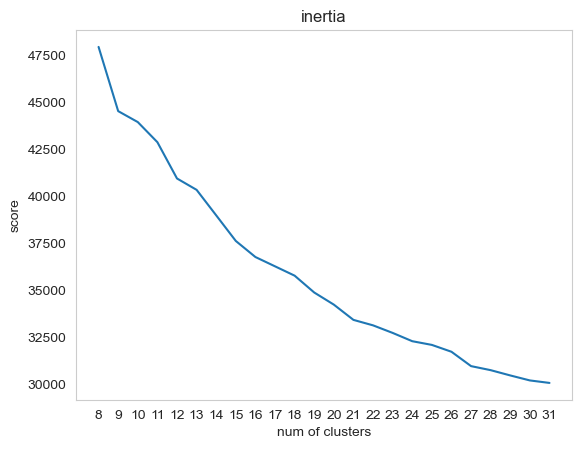

In [55]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

Increases can be seen at 15, 19, 22 and 30, so we will use those clusters as examples

In [57]:
#instantiate KMeans with 25 clusters
kmeans_model25 = KMeans(n_clusters=25, verbose=1)
#fitting KMeans on first 350 samples
kmeans_model25.fit(PCA_components.iloc[:,0:350])

Initialization complete
Iteration 0, inertia 180010.10945581805.
Iteration 1, inertia 110640.5692341046.
Iteration 2, inertia 108123.41268058585.
Iteration 3, inertia 107253.84592449505.
Iteration 4, inertia 106813.95371369421.
Iteration 5, inertia 106679.19801493133.
Iteration 6, inertia 106615.89057191319.
Iteration 7, inertia 106597.80157583914.
Iteration 8, inertia 106590.88695534773.
Iteration 9, inertia 106586.50996902332.
Iteration 10, inertia 106582.2837032305.
Iteration 11, inertia 106578.50646005265.
Iteration 12, inertia 106574.85551203671.
Iteration 13, inertia 106570.49360363462.
Iteration 14, inertia 106567.55273969541.
Iteration 15, inertia 106566.2929544192.
Iteration 16, inertia 106565.40327706686.
Iteration 17, inertia 106564.6801370774.
Iteration 18, inertia 106564.14243493881.
Iteration 19, inertia 106563.61428362817.
Iteration 20, inertia 106562.93803699779.
Iteration 21, inertia 106562.36997971816.
Iteration 22, inertia 106562.21182330498.
Iteration 23, inertia 10

KMeans(n_clusters=25, verbose=1)

We have to save the results in a special variable and use it for the rest of the K-Means clustering

In [58]:
data_pc_matrix = PCA_components.iloc[:,0:350].to_numpy()
pc_feature_matrix = pca.components_[0:350,:]
df_analysis = pd.DataFrame(np.matmul(data_pc_matrix,pc_feature_matrix), columns=df_pca.columns)
# we add the defined clusters towards the dataframe for compairability with our labeled learning technique
df_analysis['cluster'] = kmeans_model25.labels_

In [59]:
df_analysis.head()

,overall,verified,month,dayofweek,nameGiven,asin_review_number,multipleReviews_reviewer,length,five_star_reviewer,one_star_reviewer,...,r_working,r_workout,r_worth,r_would,r_would r_recommend,r_wrong,r_year,r_year r_old,r_yet,cluster
0,0.143533,0.075606,-0.043662,-0.136499,0.000042,-0.171116,-0.390000,-0.045874,0.401020,-0.027007,...,-0.003332,-0.004020,-0.005889,-0.020918,-0.003052,-0.002533,-0.014722,-0.005648,-0.005595,1
1,-0.856251,0.075886,-0.225500,-0.136528,-0.000011,-0.170936,-0.390012,0.002185,-0.598995,0.972880,...,-0.002801,-0.005174,-0.006398,-0.021017,-0.010691,-0.004145,-0.010883,-0.019461,-0.005883,22
2,0.143815,0.075788,0.501739,-0.303100,0.000624,-0.171274,-0.389979,0.027356,0.400948,-0.026852,...,-0.004540,-0.004510,-0.007064,-0.020402,-0.009660,-0.003706,-0.019982,-0.001438,-0.006351,9
3,-0.106191,0.075772,0.501788,-0.469836,0.000595,-0.171034,-0.390013,-0.014167,-0.598993,-0.026931,...,-0.003149,-0.005272,-0.005601,-0.020916,-0.005458,-0.004717,-0.015167,-0.004759,-0.005789,0
4,0.143610,0.075675,0.047271,0.363490,-0.000605,-0.159595,-0.389987,0.019359,0.400989,-0.027150,...,-0.005974,-0.002359,-0.004809,-0.018993,-0.008644,-0.000045,-0.011202,-0.029646,-0.006794,16


In [60]:
#getting names of non-token features and cluster for analysis
non_tokens_clust = list(df_analysis.columns[0:12]) + ['cluster']
#getting names of token features and cluster for analysis
tokens_clust = list(df_analysis.columns[12:])
#getting the mean token value per cluster
df_tokens = df_analysis.loc[:,tokens_clust].groupby('cluster').mean()

In [61]:
df_analysis

,overall,verified,month,dayofweek,nameGiven,asin_review_number,multipleReviews_reviewer,length,five_star_reviewer,one_star_reviewer,...,r_working,r_workout,r_worth,r_would,r_would r_recommend,r_wrong,r_year,r_year r_old,r_yet,cluster
0,0.143533,0.075606,-0.043662,-0.136499,0.000042,-0.171116,-0.390000,-0.045874,0.401020,-0.027007,...,-0.003332,-0.004020,-0.005889,-0.020918,-0.003052,-0.002533,-0.014722,-0.005648,-0.005595,1
1,-0.856251,0.075886,-0.225500,-0.136528,-0.000011,-0.170936,-0.390012,0.002185,-0.598995,0.972880,...,-0.002801,-0.005174,-0.006398,-0.021017,-0.010691,-0.004145,-0.010883,-0.019461,-0.005883,22
2,0.143815,0.075788,0.501739,-0.303100,0.000624,-0.171274,-0.389979,0.027356,0.400948,-0.026852,...,-0.004540,-0.004510,-0.007064,-0.020402,-0.009660,-0.003706,-0.019982,-0.001438,-0.006351,9
3,-0.106191,0.075772,0.501788,-0.469836,0.000595,-0.171034,-0.390013,-0.014167,-0.598993,-0.026931,...,-0.003149,-0.005272,-0.005601,-0.020916,-0.005458,-0.004717,-0.015167,-0.004759,-0.005789,0
4,0.143610,0.075675,0.047271,0.363490,-0.000605,-0.159595,-0.389987,0.019359,0.400989,-0.027150,...,-0.005974,-0.002359,-0.004809,-0.018993,-0.008644,-0.000045,-0.011202,-0.029646,-0.006794,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99779,-0.357082,0.075038,-0.134565,0.530331,0.000144,-0.169031,0.610072,0.038402,-0.598887,-0.026048,...,-0.004182,-0.005738,-0.004768,-0.018414,-0.008626,-0.000910,-0.016451,-0.010990,-0.006941,5
99780,-0.106353,0.075790,-0.134561,-0.136495,-0.000407,-0.169754,-0.390011,-0.019797,-0.598991,-0.026986,...,-0.004163,-0.005308,-0.006568,-0.020841,-0.003876,-0.003225,-0.014625,-0.004188,-0.006148,8
99781,-0.354582,0.075734,0.410906,0.196527,0.000584,-0.170464,0.609917,0.010889,-0.599244,-0.026459,...,-0.003389,-0.005996,-0.005797,-0.022963,-0.005836,-0.002300,-0.016221,-0.007577,-0.008023,24
99782,-0.606286,-0.924175,-0.225487,-0.136482,0.000483,-0.169811,-0.390023,-0.004383,-0.599011,-0.026961,...,-0.004078,-0.004887,-0.006831,-0.021069,-0.007682,-0.003908,-0.016169,-0.001665,-0.006214,20


In [62]:
df_analysis.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
10    0.143599
23    0.143597
7     0.143596
21    0.143596
1     0.143592
9     0.143591
14    0.143591
11    0.143589
3     0.143588
15    0.143585
16    0.143585
6     0.143585
12    0.143582
18    0.143571
2    -0.020824
24   -0.028511
5    -0.036067
17   -0.036575
19   -0.165077
8    -0.225577
4    -0.227081
0    -0.232273
20   -0.258234
13   -0.651678
22   -0.856408
Name: overall, dtype: float64

In [63]:
#getting the mean token value per cluster
df_tokens = df_analysis.loc[:,tokens_clust].groupby('cluster').mean()

In [64]:
df_review = df_tokens.iloc[:,0:1153]

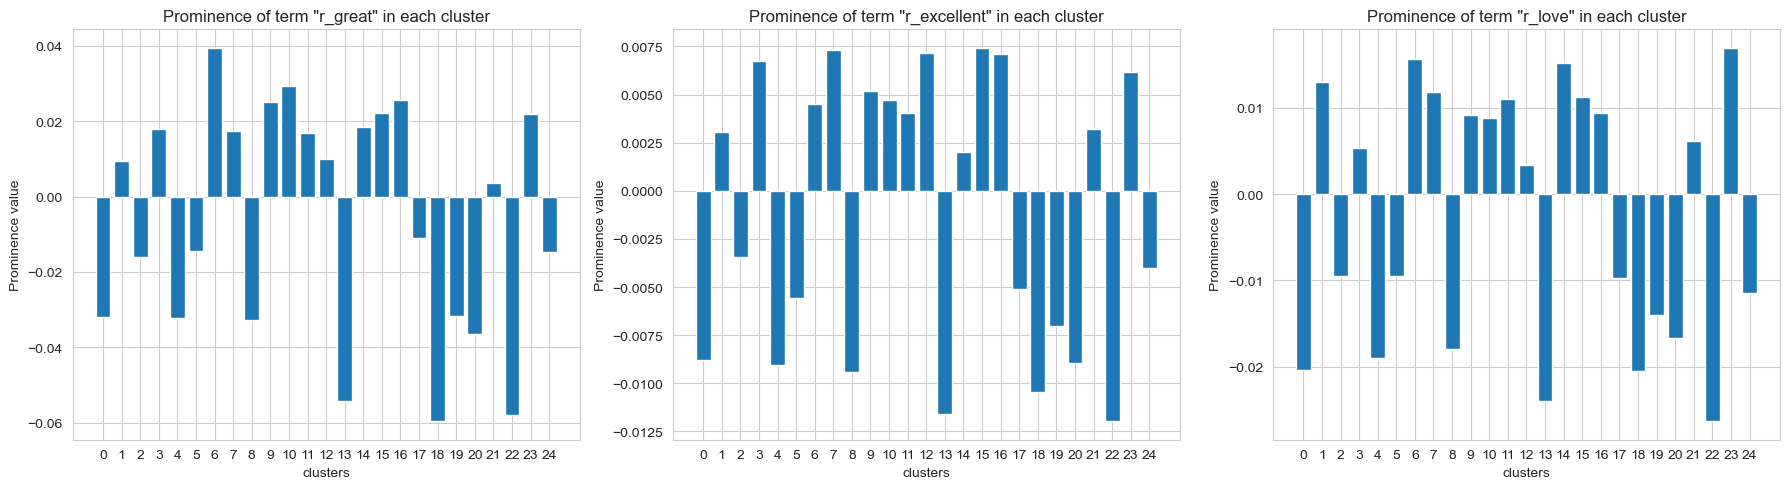

In [96]:
# show positive tokens per cluster
tokens = ['r_great', 'r_excellent', 'r_love']
df_tokens = df_analysis[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

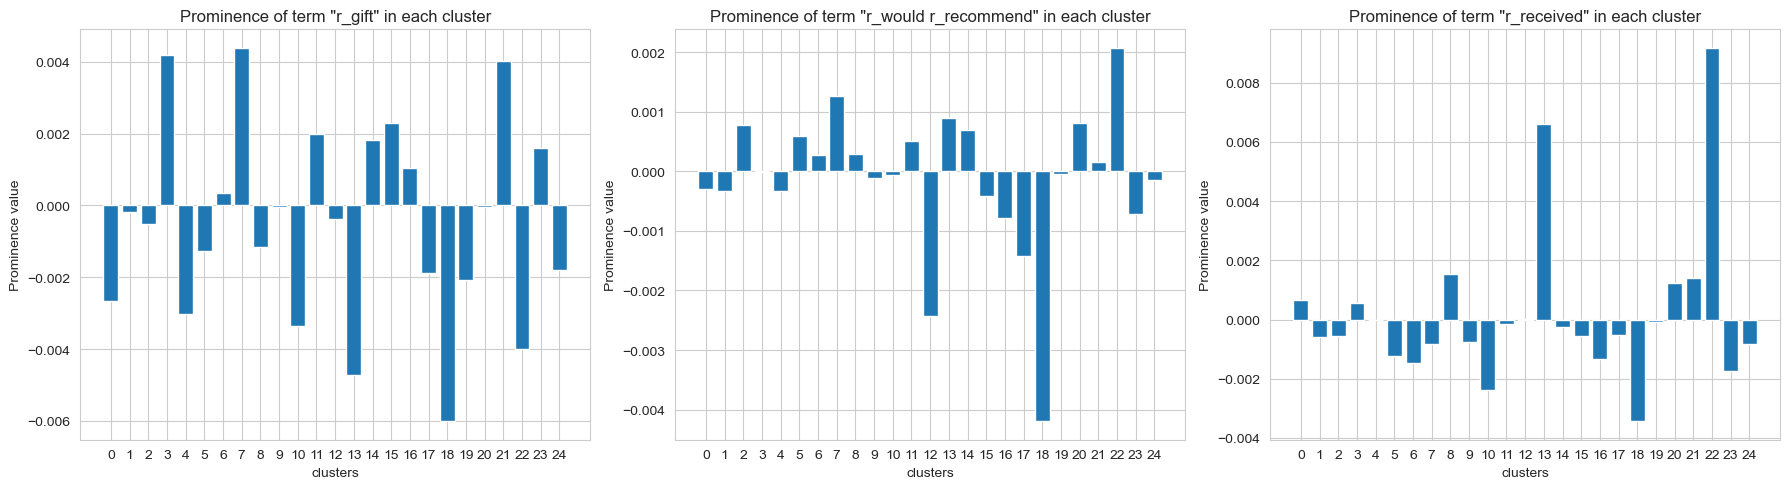

In [97]:
# show gifting or recieving clusters per token to compare those results to short review texts
tokens = ['r_gift', 'r_would r_recommend', 'r_received']
df_tokens = df_analysis[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

(array([  9.21558965, -13.70514506,  16.85090487, -11.12815126,
          7.47059331,  10.64613047, -10.94436851, -18.84350072,
         11.31175654, -37.31309849, -11.32540202, -19.59144367,
         24.12023331,  12.24001024, -26.66637763, -22.47872919,
        -39.46175304,   8.74069986, -18.07813327,  59.5340995 ,
         33.85647209,  36.75964289,  12.75872253, -13.9687524 ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

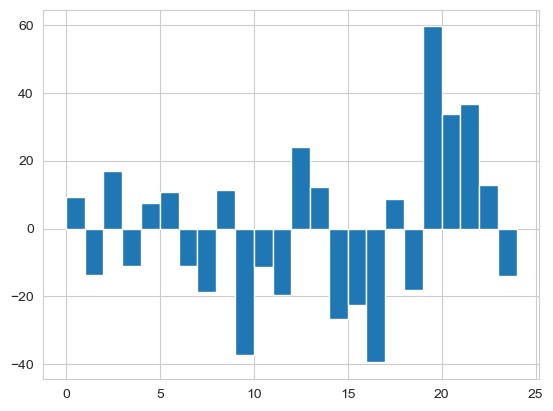

In [93]:
#Get count of values in a categorical variable, with how much stars a product has been rated
plt.hist(df_analysis.cluster, weights=df_analysis.length, bins=24)

## Conclusion

For implementing a completely unsupervised learning module we found that cluster 10, 16 and 17 have been extremely positive compared to the word count they have used. We would now check those values and see if those flags have been positive or not. In order to prove these clusters as positive we also wanted to implement a supervised learning model and keep the indexes for those values and see if they overlap.

### 1c) Assiociation Analysis

#### Grundintention: 
Finden von frequent itemsets, d.h. von Produkten, die oft miteinander gekauft werden. Dazu sollen Assoziationsregeln aufgestellt werden.
#### Grundansatz: 
Wir betrachten für die Assoziations-Analyse aus dem Meta-Datensatz die folgenden Features: `asin`, `also_buy`, `also_view` und `category`. 
Diese Features sind für uns die Kernelemente einer einzigartigen User-Session. Dabei bilden `asin` und `also_buy` den Warenkorb des Kunden. In `also_view` werden die Produkte gelistet, die sich ein Kunde angeschaut, aber nicht gekauft hat. 


> User-Session = Warenkorb + Angeschaute Objekte

> Warenkorb = Gekauftes Hauptprodukt (`asin`) + Nebeneinkäufe (`also_buy`)

> Angeschaute Objekte = `also_view`

**Annahme:** Die Wahrscheinlichkeit, dass zwei User eine exakt selbe User-Session durchgeführt haben, halten wir für vernachlässigbar. 

**Generelle Bedingung:** Damit ein Eintrag aus dem Datensatz für die Assoziations-Analyse in Frage kommt, darf `also_buy` nicht leer sein, da dann nur ein Produkt gekauft wurde und somit kein relevants Itemset darstellt.

#### Herausforderungen und Lösungsansätze  

1.   Duplikate: Jede `asin` hat einen zugehörigen Warenkorb, der durch sich selbst und `also_buy` repräsentiert wird. Jede ASIN in `also_buy` hat einen eigenen Eintrag, der jedoch den selben Warenkorb repräsentiert. Hier müssen wir Lösungen finden, auf die im weiteren Verlauf eingegangen wird.
2.   Leere Einträge in `also_buy`: Transaktionen, die nur ein Produkt enthalten und dessen `also_buy`-Liste leer ist, werden nicht betrachtet und aus dem Datensatz aussortiert.

In [6]:
# Für unser weiteres Vorgehen sind nur die Spalten 'also_buy', 'asin', 'also_view' und 'category' relevant
associ = meta_df[['also_buy', 'asin', 'also_view', 'category']]

# Nur Zeilen berücksichtigen, in denen 'also_buy' nicht leer ist
associ_df = associ[associ['also_buy'].map(lambda d: len(d) > 0)]

# Nur Zeilen berücksichtigen, in denen 'category' nicht leer ist
associ_df = associ_df[associ_df['category'].map(lambda d: len(d) > 0)]

associ_df

,also_buy,asin,also_view,category
2,[B01MYHD3LV],0000031860,"[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",0000031895,"[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQW]",0000032034,"[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
8,[B07C12VSM5],0000031887,"[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",0692747222,[],"[Sports & Outdoors, Sports & Fitness, Exercise..."
...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...",B000CC1QLS,"[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...",B000CC59FC,"[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[Sports & Outdoors, Outdoor Recreation, Climbi..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...",B000CC6668,"[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[Sports & Outdoors, Sports & Fitness, Other Sp..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...",B000CCBPAA,"[1591792819, 0974470643, 1450400248]","[Sports & Outdoors, Sports & Fitness, Exercise..."


#### Finding #1
Zuerst wurden initial 20.000 Zeilen des Meta-Datensatzes importiert. Nach der Filterung der für die Assoziationsanalyse relevanten Spalten, in denen die Ausprägungen keine leere Liste darstellen, bleiben 6.556 Zeilen übrig. Das sind knapp 32.8% des ursprünglichen Datensatzes. <br>
Dies ist darauf zurückzuführen, dass sich einige Transaktionen aus **lediglich einem gekauften Produkt** zusammensetzen. Verdeutlicht wird es, wenn man zuerst nur auf `also_buy` filtert (Länge der Liste je Zeile > 0). Hier wird der Datensatz von 20.000 Zeilen auf 6.900 reduziert (-65.5%). <br>
Die Bereinigung von Daten, in denen `category` nicht leer ist, reduziert den Datensatz dann final auf 6.556 Zeilen - also circa um weitere 5.0%. Wir nehmen an, dass diese 5.0% ASINs darstellen, die nicht der Überkategorie 'Sports & Outdoors' angehören oder eine Anomalie vorliegt.


In [8]:
# Erstellen einer ProductsBought Column und initial mit 0 befüllen, um asin + also_buy zu verbinden
# Wir nehmen an, dass also_buy + title = Warenkorb ist
associ_df['ProductsBought'] = 0

In der obenstehenden Code-Zelle wurde eine neue Spalte erstellt und initial mit 0 befüllt: `ProductsBought`. 
Diese Spalte soll das Resultat der Konkatenation der Spalten `also_buy`und `asin` darstellen, basierend auf unserer grundlegenden Annahme, dass ein Warenkorb aus `asin` und `also_buy` besteht.

In [9]:
# Iterieren über jede Zeile und erweitern der Liste um die Werte in also_buy und asin
# Für jede Zeile wird eine Liste erstellt
for index in range(len(associ_df)):
  indexlist = list()
  if len(associ_df.iloc[index][0]) == 0:
    pass
  else:
    for entry in associ_df.iloc[index][0]:
      indexlist.append(entry)
  indexlist.append(associ_df.iloc[index][1])
  associ_df['ProductsBought'].iloc[index] = indexlist
associ_df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,also_buy,asin,also_view,category,ProductsBought
2,[B01MYHD3LV],0000031860,"[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B01MYHD3LV, 0000031860]"
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...",0000031895,"[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQW]",0000032034,"[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ..."
8,[B07C12VSM5],0000031887,"[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B07C12VSM5, 0000031887]"
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",0692747222,[],"[Sports & Outdoors, Sports & Fitness, Exercise...","[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X..."
...,...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...",B000CC1QLS,"[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...",B000CC59FC,"[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[Sports & Outdoors, Outdoor Recreation, Climbi...","[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...",B000CC6668,"[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[Sports & Outdoors, Sports & Fitness, Other Sp...","[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...",B000CCBPAA,"[1591792819, 0974470643, 1450400248]","[Sports & Outdoors, Sports & Fitness, Exercise...","[1938477073, 1591792819, 1450400248, 080521031..."


Nachdem der Warenkorb erstellt worden ist, werden im nächsten Schritt die Spalten `ProductsBought`(Warenkorb) und `also_view` extrahiert, um die Grundlage für die Identifikation der User-Sessions zu schaffen.

In [10]:
# Erstellen eines neuen DataFrames.
# Wir nehmen an, dass ProductsBought und also_view eine einzigartige User-Session darstellen.
result_df = pd.DataFrame(data=associ_df[['ProductsBought', 'also_view']])
result_df

,ProductsBought,also_view
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[]
...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]"


Damit wir im Folgenden Duplikate ausschließen können, werden die Spalten `ProductsBought` und `also_view` sortiert gemäß dem Ansatz, dass für jeden Warenkorb > 1 Item jede ASIN eine eigenen Transaktions-Eintrag bekommt. 
Dies dient dazu die einzelnen Spalten genau miteinander vergleichen zu können ohne auf die Reihenfolge der ASINs zu beachten, die keine Differenzierung einer Session darstellt. 
Verdeutlichung: Gegeben sei eine Transaktion mit den Items X, Y, Z. Eine weitere Transaktion hat die Reihenfolge Y, X, Z. Für uns stellt dies die selbe User-Session dar, basierend auf den obenstehenden Annahmen.

In [11]:
# Sortieren von ProductsBought in alphabetischer Reihenfolge
productsbought_col = result_df['ProductsBought']
productsbought_col = productsbought_col.map(sorted)

# Sortieren von also_view in alphabetischer Reihenfolge
alsoview_col = result_df['also_view']
alsoview_col = alsoview_col.map(sorted)

# Sortierte Spalten result_df anhängen. So können wir sicherstellen, dass Duplikate die selbe Reihenfolge von ASINs haben
result_df['ProductsBoughtSorted'] = productsbought_col
result_df['AlsoViewSorted'] = alsoview_col
result_df

,ProductsBought,also_view,ProductsBoughtSorted,AlsoViewSorted
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[0000031860, B01MYHD3LV]","[0000031887, B005C4Y4F6, B007XAI53E, B00KF54D6..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK...","[B001CK3OIW, B00942YEVQ, B009THX5MA, B009THXHP..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ...","[B00CL1NYP4, B00D0FCQQI, B00JHNSNSM, B00KKNXKF..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[0000031887, B07C12VSM5]","[0000031860, B008F0SMUC, B00D0ZXGOY, B074R6R1B..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3...",[]
...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ...","[B000BAXHOA, B0011UBZ6G, B0014B1E8Q, B002HHZ4Y..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[0762755334, 0762782072, 0762790040, 097401121...","[B0001VO9EQ, B0026LUVTG, B002J8VXRU, B003VOSDD..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG...","[B002HODNOC, B002KSDI2C, B003M9A5FQ, B0063O1V7..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]","[0385721544, 0609810340, 0805210318, 086547752...","[0974470643, 1450400248, 1591792819]"


Für die Duplikatentferung werden nun die sortierten Listen `ProductsBoughtSorted` sowie `AlsoViewSorted` zusammengeführt. Dies stellt für uns die absolut einzigartige User-Session dar (`UserSession`). 
Im Anschluss wird eine boolsche Maske (`mask`) erstellt, um Duplikate zu identifizieren. Im Anschluss wird diese Maske auf unserem Datensatz angewandt.

In [12]:
# Zusammenführen beider sortierten Listen
col1 = result_df['ProductsBoughtSorted']
col2 = result_df['AlsoViewSorted']
col3 = [x + y for x, y in zip(col1, col2)]
result_df['UserSession'] = col3

# Suche nach Duplikaten
# Erstellen einer boolschen Maske zur Identifizierung von Duplikaten in UserSession
mask = result_df['UserSession'].duplicated()

# Anwenden der Maske auf unseren Datensatz
result_df = result_df[~mask]

result_df


,ProductsBought,also_view,ProductsBoughtSorted,AlsoViewSorted,UserSession
2,"[B01MYHD3LV, 0000031860]","[B0152HBC52, B07C29WWV1, B01M0BIP9H, B00VXJHFR...","[0000031860, B01MYHD3LV]","[0000031887, B005C4Y4F6, B007XAI53E, B00KF54D6...","[0000031860, B01MYHD3LV, 0000031887, B005C4Y4F..."
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR...","[B009THXHPA, B079PYLZTM, B079PQPLT3, B00UP6A3R...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK...","[B001CK3OIW, B00942YEVQ, B009THX5MA, B009THXHP...","[0000031895, B00009IMCT, B00097E7R6, B000F3KPK..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ...","[B07CPV7P5B, B01JS7F3WU, B074WJ2C43, B01GYA3L2...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ...","[B00CL1NYP4, B00D0FCQQI, B00JHNSNSM, B00KKNXKF...","[0000032034, B00P87ZO2E, B07BSZ4GYZ, B07CJWWMQ..."
8,"[B07C12VSM5, 0000031887]","[B00D0ZXGOY, B07GXKD7DZ, 0000031860, B008F0SMU...","[0000031887, B07C12VSM5]","[0000031860, B008F0SMUC, B00D0ZXGOY, B074R6R1B...","[0000031887, B07C12VSM5, 0000031860, B008F0SMU..."
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3...",[],"[0692747222, B000SOXALE, B0056XU5XS, B01DJBCN3..."
...,...,...,...,...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN...","[B01DVZB3H4, B005JEQQPK, B003M6VWHE, B06XRV4CS...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ...","[B000BAXHOA, B0011UBZ6G, B0014B1E8Q, B002HHZ4Y...","[B000CC1QLS, B000HHLPNW, B000HHSCT2, B002HW9AJ..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8...","[B07CR6PTMJ, B07C15NW28, B00CH3E5ZY, B07LF5VBY...","[0762755334, 0762782072, 0762790040, 097401121...","[B0001VO9EQ, B0026LUVTG, B002J8VXRU, B003VOSDD...","[0762755334, 0762782072, 0762790040, 097401121..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F...","[B01DY1KGWS, B00D6D4GPI, B077DTCLN5, B00EJFC5T...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG...","[B002HODNOC, B002KSDI2C, B003M9A5FQ, B0063O1V7...","[1570768862, B0006G57YW, B0006G5NQY, B000A6XGG..."
19989,"[1938477073, 1591792819, 1450400248, 080521031...","[1591792819, 0974470643, 1450400248]","[0385721544, 0609810340, 0805210318, 086547752...","[0974470643, 1450400248, 1591792819]","[0385721544, 0609810340, 0805210318, 086547752..."


#### Finding #2:
Die Duplikatentfernung bereinigt unseren Datensatz von 6.556 Einträgen auf 4.758 (-27.4%). <br>
Insgesamt konnten wir durch diese Filterschritte den initialen Datensatz von 20.000 Zeilen auf 4.758 reduzieren. Am Ende bleiben also 23.8% des Originaldatensatzes übrig.

In [13]:
# Für die Bestimmung von frequent itemsets und association rules nutzen wir nur ProductsBought, ergo den gesamten Warenkorb einer Session
final_df = pd.DataFrame(data=result_df['ProductsBought'])
final_df

,ProductsBought
2,"[B01MYHD3LV, 0000031860]"
4,"[B009THXHPA, B00BEU1ZBI, B079PYLZTM, B00BEU1ZR..."
5,"[B07BSZ4GYZ, B00P87ZO2E, B07CPV7P5B, B07CJWWMQ..."
8,"[B07C12VSM5, 0000031887]"
13,"[B0713Z5DGM, B01KUDOLN8, B01DJBCN3I, B0056XU5X..."
...,...
19974,"[B007YDMIAG, B00CNT6K6O, B0041D6ZV0, B000HHLPN..."
19977,"[B0078FWCJW, B00CH3E5ZY, B01DWBLZ98, B008KECI8..."
19978,"[B002HPWC2U, B00J4KC6SG, B003X3V00U, B000CEC9F..."
19989,"[1938477073, 1591792819, 1450400248, 080521031..."


In [14]:
# Laden des gesamten Datensatzes, um später die Daten auf title und category matchen zu können
compare = pd.read_json("/content/drive/MyDrive/DeepLearning_WiSe22-23/meta_Sports_and_Outdoors.json", lines=True)

#### Transformieren der Daten
Im Folgenden werden nun die einzelnen Warenkörbe aus `final_df` in eine Liste von ASINs überführt und einer übergeordneten Liste angefügt. Diese zweidimensionale Liste `data_to_be_encoded` ist die Bedingung für die Transformation der Daten in ein für die Assoziationsanalyse geeignetes Format. Es wird dazu verwendet, um den `TransactionEncoder` auf unseren Warenkorb anzuwenden. Dieser dient dazu, jedes Produkt in eine eigene Spalte umzuwandeln. Jede Transaktion stellt dann eine Zeile dar. Die Werte je Zeile werden dann mit `True`/`False` befüllt, um zu definieren, ob jene ASIN (Spalte) im Warenkorb enthalten war.

#### Wichtiger Vorschritt
Im nächsten Schritt werden wir nun alle ASINs der zweidimensionalen `data_to_be_encoded` entfernen, die nicht der Überkategorie 'Sports & Outdoors' angehören. Das ist aus dem Grund notwendig, da wir im Laufe des Projekts feststellen mussten, dass frequent Itemsets mit ASINs gebildet werden, die keine Kategorie hatten. Sie stammten wahrscheinlich aus einer anderen Kategorie. Da wir dies nicht von vornherein ausschließen können durch unsere erste Filterung auf `category`, da unsere Leistungsfähigkeit leider nur 20.000 Daten umfasst, müssen wir hier diesen Schritt ausführen, um sicherzustellen, dass ausschließlich ASINs der Kategorie 'Sports & Outdoors' im Datensatz enthalten sind. <br>
Die dafür durchzführenden Schritte sind die Folgenden:
1. Umwandlung der Spalte `ProductsBought` (Warenkörbe) in eine zweidimensionale Liste `data_to_be_encoded`. 
2. Transformation der Spalte `asin` des gesamten Datensatzes in ein Dictionary, wobei die einzelnen ASINs die Keys der Dictionaries darstellen. Der Value des zugehörigen Keys entspricht dem Index der ASIN im Gesamtdatensatz. 
 - Wir nutzen aus Performance-Gründen die ASINs als Dicitionary-Keys. Würden wir die Spalte `asin` lediglich als Liste speichern und dann die Warenkorb-ASINs versuchen matchen zu wollen, würde dies erhebliche Laufzeit-Probleme und Performance-Zeit kosten. Das Dictionary bietet hier erhebliche Performance-Optimierungen. <br> Quelle: Tas, S. (2021, December 24). Faster Lookups In Python - Towards Data Science. Medium. https://towardsdatascience.com/faster-lookups-in-python-1d7503e9cd38
3. Iterieren über jedes Listenelement sowie jede Liste innerhalb eines Listenelements. 
4. Ist die ASIN kein Key des Dictionaries, so wird die ASIN als Listenelement gelöscht, da es sich dann offensichtlich nicht um ein Sport-Produkt handelt.
5. Ist die Länge des Listenelements nach der Bereinigung <= 1, so wird auch das gesamte Listenelement gelöscht, da es dann keine Bedeutung für die Assoziationsanalyse hat (Transaktionen mit 1 Item). 

In [15]:
# Entfernen von ASINs, die nicht in 'asin' des Original-Datensatzes, da sonst nicht in der Kategorie Sport vorhanden
# Wenn die ASIN in 'asin', dann ist es garantiert Sport (NaN categories wurden ja entfernt)

# 2D-Liste
data_to_be_encoded = final_df['ProductsBought'].to_list()

# Look up, ob asin im Original-Datensatz vorhanden ist
asin_col = compare['asin'].to_list()
# Umwandlung in ein dict, wobei die ASINs als Key definiert werden (Performance-Gründe Lookup)
datalist = {k: v for v, k in enumerate(asin_col)}

print(f"Before cleaning: {len(data_to_be_encoded)}")
#Iterieren über jedes Element in der zweidimensionalen Liste
for list_element in data_to_be_encoded:
  # Iterieren über jede ASIN innerhalb einer Liste
  for asin in list_element:
    # Ist die asin nicht einer der Keys, wird sie nicht im große Datensatz als asin gelistet (ergo kein Sport)
    if asin not in datalist.keys():
      # Der Eintrag wird gelöscht, wenn die obenstehende Bedingung zutrifft
      list_element.remove(asin)
  # Ist die Länge des Listenelements dann kleiner oder gleich 1, wird das komplette Listenelement gelöscht. Uns interessieren nur die Sport-Artikel.
  if len(list_element) <= 1:
    data_to_be_encoded.remove(list_element)
print(f"After cleaning: {len(data_to_be_encoded)}")
# data_to_be_encoded

Before cleaning: 4758
After cleaning: 4386


#### Finding #X:

Nach dieser Bereinigung werden die zu betrachtenden Warenkörbe/Transaktionen von 4.758 auf 4.386 reduziert (-7.8%). Diese Bereinigung hat alle Items aussortiert, die keine Sportsitems sind. Nun können wir die zweidimensionale Liste `data_to_be_encoded` mit `TransactionEncoder` in eine True/False-Matrix überführen.



Die bereinigte Liste wird nun in eine `True`/`False`-Matrix überführt, wobei jede Spalte eine einzelne ASIN darstellt. Jede Zeile stellt dabei eine Transaktion (bzw. Warenkorb) dar. 
`True` indiziert, dass diese ASIN in der Transaktion enthalten ist.
`False` indiziert, dass diese ASIN nicht in der Transaktion vorkommt.

In [16]:
# TranscationEncoder, um Transaktions Liste in True/False Matrix zu überführen
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data_to_be_encoded).transform(data_to_be_encoded)
asdf = pd.DataFrame(a_data,columns=a.columns_)
#asdf = asdf.replace(False,0.0)
#asdf = asdf.replace(True,1.0)
asdf

,0000031895,0000032034,0007145160,0007921268,0008314047,006000889X,0060256656,0060538260,0060637242,0060957034,...,B07MNVSYNR,B07MNW44PD,B07MNY39PG,B07MNY6XTN,B07MR1JC8Z,B07MR1Z684,B07MR3T72Z,B07MR5DFDQ,B07MR6RQH1,B07MRGGLWD
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Finding #3:
Mithilfe von `TransactionEncoder` entstehen 54.672 Spalten. Dies deutet darauf hin, dass die Produktauswahl des Online-Retailers sehr groß ist und die Kunden eine Bandbreite an zur Verfügung stehenden Produkten hat. 
# (Min Support Treshold bei X Transaktionen?)
Dies macht die Bestimmung von frequent itemsets dahingehend herausfordender, dass die Kunden aufgrund der großen Auswahl sehr individuell konsumieren können und somit höhere Supportwerte sehr unwahrscheinlich sind. Aus diesem Grund werden wir dies in der Auswahl des Support-Tresholds berücksichtigen. <br>
**Wir können wir den min_support wissenschaftlich basiert wählen?**

#### Anwenden von FP-Growth
Der FP Growth Algorithmus ist eine Methode zur Identifizierung häufiger Muster in Transaktionsdaten. Dazu wird ein FP-Baum erstellt, eine Datenstruktur, in der die Transaktionsdaten in einer hierarchischen Struktur gespeichert werden, wobei jedes Element eines Musters in einem Knoten dargestellt wird. Der Algorithmus durchläuft dann den FP-Baum und zählt, wie häufig jedes Muster vorkommt. Muster, die häufiger als ein vordefinierter Schwellenwert auftreten, werden als häufige Muster identifiziert. Der FP-Growth-Algorithmus ist schneller als der Apriori-Algorithmus, da er die gesamte Erkennung häufiger Muster in einem einzigen Durchgang durch die Daten durchführt. Er ist auch in der Lage, große Datensätze zu verarbeiten, was ihn für die Verarbeitung großer Mengen von Transaktionsdaten wie in unserem Use Case geeignet macht.

In [17]:
# Ableitung häufiger Elemente auf der Grundlage des FP Growth Algorithmus
new_df = fpgrowth(asdf, min_support = 0.008, use_colnames = True)
# new_df = new_df[new_df['itemsets'].map(lambda d: len(d) > 1)]
new_df

,support,itemsets
0,0.008436,(B00B4IHXRU)
1,0.011172,(B00D3PNZB0)
2,0.008664,(B015NFRKTK)
3,0.008436,(B0150TYVGY)
4,0.036252,(B001AMGGBO)
5,0.008664,(B0009V5QEA)
6,0.008208,(B00NG1ECBS)
7,0.009576,(B001ANXJVI)
8,0.008892,(B00FMXRDL4)
9,0.022572,(B0050LUBZ8)


In [18]:
# Ableitung von Assoziationsregeln auf der Grundlage des confidence treshold -> 0.6
df_ar = association_rules(new_df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B000ZKNFW0),(B001AMGGBO),0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,(B0010FFKXG),(B001AMGGBO),0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,(B07FB8P4WZ),(B001AMGGBO),0.013680,0.036252,0.008436,0.616667,17.010692,0.007940,2.514126
3,(B07M66VRZ4),(B001AMGGBO),0.013908,0.036252,0.008892,0.639344,17.636251,0.008388,2.672211
4,(B0179JC31I),(B0050LUBZ8),0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
5,(B00NW23YBA),(B0050LUBZ8),0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
6,(B00811WQJS),(B0050LUBZ8),0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


Um in den nächsten Schritten mit den ASINs weiterarbeiten zu können, werden diese in Strings umgewandelt. Durch die Erstellung der Assoziationsregeln liegen diese nämlich initial in Form von Frozensets vor. 

In [19]:
# Umwandeln von frozensets in string
df_ar["antecedents"] = df_ar["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
df_ar["consequents"] = df_ar["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [20]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,B000ZKNFW0,B001AMGGBO,0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,B0010FFKXG,B001AMGGBO,0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,B07FB8P4WZ,B001AMGGBO,0.013680,0.036252,0.008436,0.616667,17.010692,0.007940,2.514126
3,B07M66VRZ4,B001AMGGBO,0.013908,0.036252,0.008892,0.639344,17.636251,0.008388,2.672211
4,B0179JC31I,B0050LUBZ8,0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
5,B00NW23YBA,B0050LUBZ8,0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
6,B00811WQJS,B0050LUBZ8,0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


Im nächsten Schritt matchen wir die ASINs auf die Produktnamen der ASINs (`title`). Dazu itereren wir über `antecedents` sowie `consequents` und speichern die zugehörigen Namen des Produktes in einer Liste, die wir dann in ein DataFrame `rules_df` umwandeln. Dieses wird dann mit den Spalten `antecedent_support`, `consequent_support`, `support`, `confidence`, `lift`, `leverage` und `conviction` in ein finales DataFrame `association_rules_df` zusammengemerged. 
Den Namen (`title`) der ASIN extrahieren wird über `.iloc` aus dem Original-Datensatz. Dazu wird über `datalist` (= Dict mit allen ASINs als Key) der Zeilenindex extrahiert, um dann den Namen zu erhalten. 

In [ ]:
all_rules = list()
subcats = list()
for i in range(len(df_ar.index)):
  rules = list()
  subcat = list()
  try:
    rules.append(compare.iloc[datalist[df_ar['antecedents'][i]]]['title'])
    subcat.append(compare.iloc[datalist[df_ar['antecedents'][i]]]['category'])
  except KeyError:
    rules.append(df_ar['antecedents'][i])
    subcat.append(df_ar['antecedents'][i])

  try:
    rules.append(compare.iloc[datalist[df_ar['consequents'][i]]]['title'])
    subcat.append(compare.iloc[datalist[df_ar['consequents'][i]]]['category'])
  except KeyError:
    rules.append(df_ar['consequents'][i])
    subcat.append(None)

  all_rules.append(rules)
  subcats.append(subcat)

rules_df = pd.DataFrame(all_rules, columns=['antecedents', 'consequents'])
# subcats_df = pd.DataFrame(subcats)
sliced_df_ar = df_ar.iloc[:, 2:]

association_rules_df = pd.merge(rules_df, sliced_df_ar, left_index=True, right_index=True)
association_rules_df


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Panther Martin Best of the Best Kit.,"Water Gremlin Removable Split Shot Pro Pack, 4...",0.011628,0.036252,0.009804,0.843137,23.257862,0.009382,6.143895
1,Leland Lures Trout Magnet Neon Kit - 70 Grub B...,"Water Gremlin Removable Split Shot Pro Pack, 4...",0.009576,0.036252,0.008892,0.928571,25.614555,0.008545,13.492476
2,B07FB8P4WZ,"Water Gremlin Removable Split Shot Pro Pack, 4...",0.013680,0.036252,0.008436,0.616667,17.010692,0.007940,2.514126
3,B07M66VRZ4,"Water Gremlin Removable Split Shot Pro Pack, 4...",0.013908,0.036252,0.008892,0.639344,17.636251,0.008388,2.672211
4,Oumers Universal Bike Chain Tool with Chain Ho...,"Shimano Universal Standard Brake Cable Set, Fo...",0.013680,0.022572,0.009804,0.716667,31.750505,0.009495,3.449747
5,100 Pcs Alloy Road Mountain Bicycle Bike Brake...,"Shimano Universal Standard Brake Cable Set, Fo...",0.015732,0.022572,0.012540,0.797101,35.314010,0.012185,4.817325
6,Bikehand Bike Bicycle Shimano Bottom Bracket R...,"Shimano Universal Standard Brake Cable Set, Fo...",0.010488,0.022572,0.009804,0.934783,41.413702,0.009567,14.987232


### Final Finding Association Analysis

tbd

# DAS

In [ ]:
compare['title'].value_counts()

Majestic MLB Mens T-Shirt                                                                                                                                                                                                 322
Under Armour Men's Storm Armour Fleece Pants                                                                                                                                                                              215
WinCraft NFL New York Giants Logo Crystal Mirror License Plate, 6 x 12                                                                                                                                                    147
Ravenox Natural Twisted Cotton Rope | Made in the USA | Strong Triple-Strand Cordage for Sports, D&eacute;cor, Pet Toys, Crafts, Macram&eacute; &amp; Indoor Outdoor Use| By the Foot &amp; Diameter (Multiple Colors)    142
Under Armour Men's HeatGear Armour Short Sleeve Compression Shirt                                               

## Task 2

### 2a) Recommender Comparison

### 2b) Sentiment Analysis

### 2c) Topic Modeling Comparison